In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import splitfolders
from matplotlib import pyplot as plt

### Function to Create Model

In [3]:
def create_model(base_model, input_shape=(224, 224, 3), num_classes=2):
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Data Generations

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_bin = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator_bin = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator_bin = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

train_generator_cat = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator_cat = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator_cat = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4951 images belonging to 2 classes.
Found 1413 images belonging to 2 classes.
Found 709 images belonging to 2 classes.
Found 4951 images belonging to 2 classes.
Found 1413 images belonging to 2 classes.
Found 709 images belonging to 2 classes.


### Resnet50

In [7]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = create_model(resnet_base)
resnet_history = resnet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
resnet_val_loss, resnet_val_acc = resnet_model.evaluate(val_generator_cat)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_generator_cat)
print(f"ResNet - Validation Loss: {resnet_val_loss}, Validation Accuracy: {resnet_val_acc}")
print(f"ResNet - Test Loss: {resnet_test_loss}, Test Accuracy: {resnet_test_acc}")

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 700s 4s/step - accuracy: 0.9173 - loss: 0.6942 - val_accuracy: 0.9505 - val_loss: 0.1908
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 639s 4s/step - accuracy: 0.9544 - loss: 0.1267 - val_accuracy: 0.9526 - val_loss: 0.1151
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 604s 4s/step - accuracy: 0.9523 - loss: 0.1294 - val_accuracy: 0.9519 - val_loss: 0.1146
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 582s 4s/step - accuracy: 0.9523 - loss: 0.1265 - val_accuracy: 0.9582 - val_loss: 0.1016
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 572s 4s/step - accuracy: 0.9532 - loss: 0.1149 - val_accuracy: 0.9590 - val_loss: 0.1001
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1087s 7s/step - accuracy: 0.9579 - loss: 0.1018 - val_accuracy: 0.9618 - val_loss: 0.0940
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.9534 - loss: 0.1118 - val_accuracy: 0.9625 - val_loss: 0.0900
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 599s 4s/step - accuracy: 0.9549 - loss: 0.1004 - val_accuracy: 0.96

### VGG

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = create_model(vgg_base)
vgg_history = vgg_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
vgg_val_loss, vgg_val_acc = vgg_model.evaluate(val_generator_cat)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_generator_cat)
print(f"VGG - Validation Loss: {vgg_val_loss}, Validation Accuracy: {vgg_val_acc}")
print(f"VGG - Test Loss: {vgg_test_loss}, Test Accuracy: {vgg_test_acc}")

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.7689 - loss: 0.5093 - val_accuracy: 0.9338 - val_loss: 0.1831
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.9410 - loss: 0.1367 - val_accuracy: 0.9549 - val_loss: 0.1330
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.9674 - loss: 0.1205 - val_accuracy: 0.9459 - val_loss: 0.1547
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.9805 - loss: 0.0606 - val_accuracy: 0.9444 - val_loss: 0.1923
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.9737 - loss: 0.0683 - val_accuracy: 0.9188 - val_loss: 0.3339
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.9845 - loss: 0.0458 - val_accuracy: 0.9534 - val_loss: 0.1611
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.9924 - loss: 0.0315 - val_accuracy: 0.9534 - val_loss: 0.1655
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.9886 - loss: 0.0275 - val_accuracy: 0.9474 - val_loss:

### DenseNet

In [7]:
from tensorflow.keras.applications import DenseNet121

# Create and train the DenseNet model
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = create_model(densenet_base)
densenet_history = densenet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
densenet_val_loss, densenet_val_acc = densenet_model.evaluate(val_generator_cat)
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_generator_cat)
print(f"DenseNet - Validation Loss: {densenet_val_loss}, Validation Accuracy: {densenet_val_acc}")
print(f"DenseNet - Test Loss: {densenet_test_loss}, Test Accuracy: {densenet_test_acc}")

# Save the DenseNet model
densenet_model.save('densenet_model.h5')

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.7500 - loss: 0.9294 - val_accuracy: 0.9684 - val_loss: 0.1684
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.9576 - loss: 0.1785 - val_accuracy: 0.9113 - val_loss: 0.5850
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9654 - loss: 0.1216 - val_accuracy: 0.9654 - val_loss: 0.1574
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9684 - val_loss: 0.1520
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.9855 - loss: 0.0355 - val_accuracy: 0.9594 - val_loss: 0.2593
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9654 - val_loss: 0.2392
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9699 - val_loss: 0.1823
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9990 - loss: 0.0085 - val_accuracy: 0.9624 - val_loss:

DenseNet - Validation Loss: 0.27619627118110657, Validation Accuracy: 0.9624060392379761
DenseNet - Test Loss: 0.2946264147758484, Test Accuracy: 0.9537750482559204


### MobileNet

In [8]:
from tensorflow.keras.applications import MobileNetV2

# Create and train the MobileNetV2 model
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model = create_model(mobilenet_base)
mobilenet_history = mobilenet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
mobilenet_val_loss, mobilenet_val_acc = mobilenet_model.evaluate(val_generator_cat)
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_generator_cat)
print(f"MobileNetV2 - Validation Loss: {mobilenet_val_loss}, Validation Accuracy: {mobilenet_val_acc}")
print(f"MobileNetV2 - Test Loss: {mobilenet_test_loss}, Test Accuracy: {mobilenet_test_acc}")

# Save the MobileNetV2 model
mobilenet_model.save('models/mobilenet_model.h5')

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7620 - loss: 1.4149 - val_accuracy: 0.9368 - val_loss: 0.4293
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9776 - loss: 0.1019 - val_accuracy: 0.9669 - val_loss: 0.2439
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9773 - loss: 0.0455 - val_accuracy: 0.9684 - val_loss: 0.2075
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9779 - loss: 0.0404 - val_accuracy: 0.9158 - val_loss: 0.5224
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9903 - loss: 0.0140 - val_accuracy: 0.9534 - val_loss: 0.3384
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9218 - val_loss: 0.5190
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.9579 - val_loss: 0.3584
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9997 - loss: 0.0059 - val_accuracy: 0.9459 - val_loss:

MobileNetV2 - Validation Loss: 0.6477646231651306, Validation Accuracy: 0.9037594199180603
MobileNetV2 - Test Loss: 0.696670413017273, Test Accuracy: 0.9013867378234863


#### AlexNet

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Function to create AlexNet model
def create_alexnet(input_shape=(224, 224, 3), num_classes=2):
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the AlexNet model
alexnet_model = create_alexnet()
alexnet_history = alexnet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
alexnet_val_loss, alexnet_val_acc = alexnet_model.evaluate(val_generator_cat)
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(test_generator_cat)
print(f"AlexNet - Validation Loss: {alexnet_val_loss}, Validation Accuracy: {alexnet_val_acc}")
print(f"AlexNet - Test Loss: {alexnet_test_loss}, Test Accuracy: {alexnet_test_acc}")

# Save the AlexNet model
alexnet_model.save('models/alexnet_model.h5')

E:\Programing\ML\ml-venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5836 - loss: 0.6765 - val_accuracy: 0.8526 - val_loss: 0.4790
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7412 - loss: 0.5577 - val_accuracy: 0.7338 - val_loss: 0.5759
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8499 - loss: 0.3877 - val_accuracy: 0.8632 - val_loss: 0.2929
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8668 - loss: 0.3999 - val_accuracy: 0.8707 - val_loss: 0.2275
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9083 - loss: 0.2598 - val_accuracy: 0.9248 - val_loss: 0.1998
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9209 - loss: 0.2314 - val_accuracy: 0.9248 - val_loss: 0.1991
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9289 - loss: 0.2051 - val_accuracy: 0.8917 - val_loss: 0.2407
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9372 - loss: 0.2140 - val_accuracy: 0.8992 - val_loss:

AlexNet - Validation Loss: 0.16861878335475922, Validation Accuracy: 0.9428571462631226
AlexNet - Test Loss: 0.19540925323963165, Test Accuracy: 0.9306625723838806


### Dataset Preparation and DataLoaders

In [15]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define paths
data_dir = 'dataset'
train_dir = f'{data_dir}/train'
val_dir = f'{data_dir}/val'
test_dir = f'{data_dir}/test'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


### Faster R-CNN

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create Faster R-CNN model
def get_fasterrcnn_fpn(num_classes):
    backbone = resnet_fpn_backbone('resnet50', pretrained=True)
    model = FasterRCNN(backbone, num_classes=num_classes)
    return model

num_classes = 3  # Example: Background, defective, nondefective
model = get_fasterrcnn_fpn(num_classes)
model.to(device)

# Training Faster R-CNN model
def train_fasterrcnn_model(model, data_loader, num_epochs):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
    for epoch in range(num_epochs):
        for images, targets in data_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()
            
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {losses.item()}")

# Train the model
train_fasterrcnn_model(model, train_loader, num_epochs=10)

# Save the Faster R-CNN model
# torch.save(model.state_dict(), 'fasterrcnn_fpn.pth')

### ConvNet

In [8]:
convnet_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
convnet_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
convnet_history = convnet_model.fit(
    train_generator_bin,
    steps_per_epoch=train_generator_bin.samples // train_generator_bin.batch_size,
    epochs=10,
    validation_data=val_generator_bin,
    validation_steps=val_generator_bin.samples // val_generator_bin.batch_size
)
convnet_val_loss, convnet_val_acc = convnet_model.evaluate(val_generator_bin)
convnet_test_loss, convnet_test_acc = convnet_model.evaluate(test_generator_bin)
print(f"ConvNet - Validation Loss: {convnet_val_loss}, Validation Accuracy: {convnet_val_acc}")
print(f"ConvNet - Test Loss: {convnet_test_loss}, Test Accuracy: {convnet_test_acc}")

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9209 - loss: 0.2219 - val_accuracy: 0.9503 - val_loss: 0.1057
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 3/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9523 - loss: 0.1021 - val_accuracy: 0.9510 - val_loss: 0.0946
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 3.4433e-32
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9533 - loss: 0.0968 - val_accuracy: 0.9595 - val_loss: 0.0758
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.9688 - loss: 0.0487 - val_accuracy: 0.8000 - val_loss: 0.1423
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9554 - loss: 0.0834 - val_accuracy: 0.9517 - val_loss: 0.1192
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.9375 - loss: 0.0947 - val_accuracy: 0.8000 - val_loss: 0.2559
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9545 - loss: 0.0923 - val_accuracy: 0.9638 - val_loss: 0.0757
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.9688 - loss: 0.0754 - val_accura

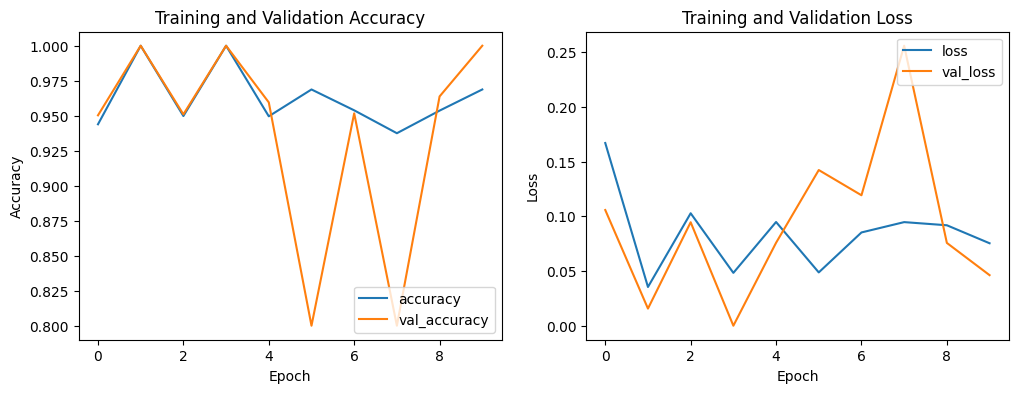

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(convnet_history.history['accuracy'], label='accuracy')
plt.plot(convnet_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(convnet_history.history['loss'], label='loss')
plt.plot(convnet_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Adaptive SSN

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.layers import GlobalAveragePooling2D, Multiply

def adaptive_ssn(input_shape):
    inputs = Input(shape=input_shape)
    
    # First convolutional block
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    # Second convolutional block
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    # Third convolutional block
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Adaptive Smoothing Layer (a simplified example)
    attention = GlobalAveragePooling2D()(x)
    attention = Dense(128, activation='sigmoid')(attention)
    attention = Dense(128, activation='sigmoid')(attention)
    x = Multiply()([x, attention])
    
    # Fully connected layer
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, x)
    return model

adaptive_ssn_model = adaptive_ssn((224, 224, 3))
adaptive_ssn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adaptive_ssn_model.summary()

adaptive_ssn_history = adaptive_ssn_model.fit(
    train_generator_bin,
    steps_per_epoch=train_generator_bin.samples // train_generator_bin.batch_size,
    validation_data=val_generator_bin,
    validation_steps=val_generator_bin.samples // val_generator_bin.batch_size,
    epochs=10
)

adaptive_ssn_val_loss, adaptive_ssn_val_acc = adaptive_ssn_model.evaluate(val_generator_bin)
adaptive_ssn_test_loss, adaptive_ssn_test_acc = adaptive_ssn_model.evaluate(test_generator_bin)
print(f"Adaptive SSN - Validation Loss: {adaptive_ssn_val_loss}, Validation Accuracy: {adaptive_ssn_val_acc}")
print(f"Adaptive SSN - Test Loss: {adaptive_ssn_test_loss}, Test Accuracy: {adaptive_ssn_test_acc}")

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 224, 224,  │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 112, 112,  │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 56, 56,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_8[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     16,512 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 56, 56,    │          0 │ activation_8[0][… │
│ (Multiply)          │ 128)              │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 401408)    │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │ 51,380,352 │ flatten_4[0][0] 

 Total params: 51,508,161 (196.49 MB)

 Trainable params: 51,507,457 (196.49 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 554s 4s/step - accuracy: 0.7650 - loss: 0.7537 - val_accuracy: 0.9510 - val_loss: 0.2331
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.2207 - val_accuracy: 0.8000 - val_loss: 0.9478
Epoch 3/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - accuracy: 0.9628 - loss: 0.1300 - val_accuracy: 0.9503 - val_loss: 0.1228
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9375 - loss: 0.1696 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 481s 3s/step - accuracy: 0.9669 - loss: 0.0796 - val_accuracy: 0.9503 - val_loss: 0.1335
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 4.2580e-04
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9709 - loss: 0.0725 - val_accuracy: 0.9510 - val_loss: 0.9664
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 0.8000 - val_loss: 4.6522
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 582s 4s/step - accuracy: 0.9598 - loss: 0.0800 - val_accuracy: 0.9609 - val_loss: 0.1242
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9062 - loss: 0.1754 - val_accuracy: 0.80

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(adaptive_ssn_history.history['accuracy'], label='accuracy')
plt.plot(adaptive_ssn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(adaptive_ssn_history.history['loss'], label='loss')
plt.plot(adaptive_ssn_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Saving the model

In [12]:
resnet_model.save('models/resnet_model.keras')
vgg_model.save('models/vgg_model.keras')
densenet_model.save('models/densenet_model.h5')
convnet_model.save('models/convnet_model.keras')
adaptive_ssn_model.save('models/adaptive_ssn_model.h5')